In [1]:
# 225150207111001_1 MUHAMMAD NADHIF_1
# 225150201111002_2 NALENDRA MARCHELO_2
# 225150200111005_3 NARENDRA ATHA ABHINAYA_3
 # 225150200111003_4 YOSUA SAMUEL EDLYN SINAGA_4

## Impor Library yang Dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_style('whitegrid')

## Memuat dan Memeriksa Data

In [3]:
# Muat dataset
file_path = 'data/Heart_Disease_Prediction.csv'
df = pd.read_csv(file_path)

df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

print("5 Baris Pertama Data (setelah mapping):")
display(df.head())

print("\nInformasi Dataset (setelah mapping):")
df.info()

5 Baris Pertama Data (setelah mapping):


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,52,1,1,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,1,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,1,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,1,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,1,138,294,1,1,106,0,1.9,1,3,2,0



Informasi Dataset (setelah mapping):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1025 non-null   int64  
 1   Sex                      1025 non-null   int64  
 2   Chest pain type          1025 non-null   int64  
 3   BP                       1025 non-null   int64  
 4   Cholesterol              1025 non-null   int64  
 5   FBS over 120             1025 non-null   int64  
 6   EKG results              1025 non-null   int64  
 7   Max HR                   1025 non-null   int64  
 8   Exercise angina          1025 non-null   int64  
 9   ST depression            1025 non-null   float64
 10  Slope of ST              1025 non-null   int64  
 11  Number of vessels fluro  1025 non-null   int64  
 12  Thallium                 1025 non-null   int64  
 13  Heart Disease            1025 non-null  

## Exploratory Data Analysis (EDA)


Statistik Deskriptif:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,1.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,1.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,1.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,3.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



Jumlah Nilai yang Hilang per Kolom:
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


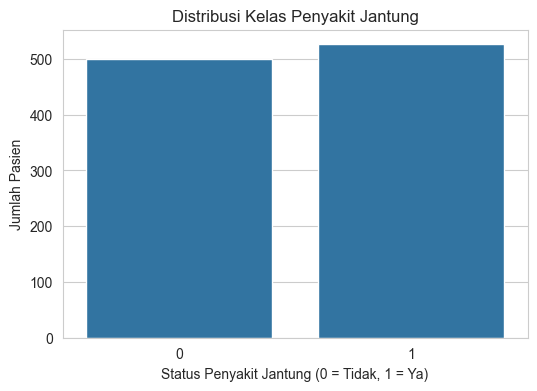

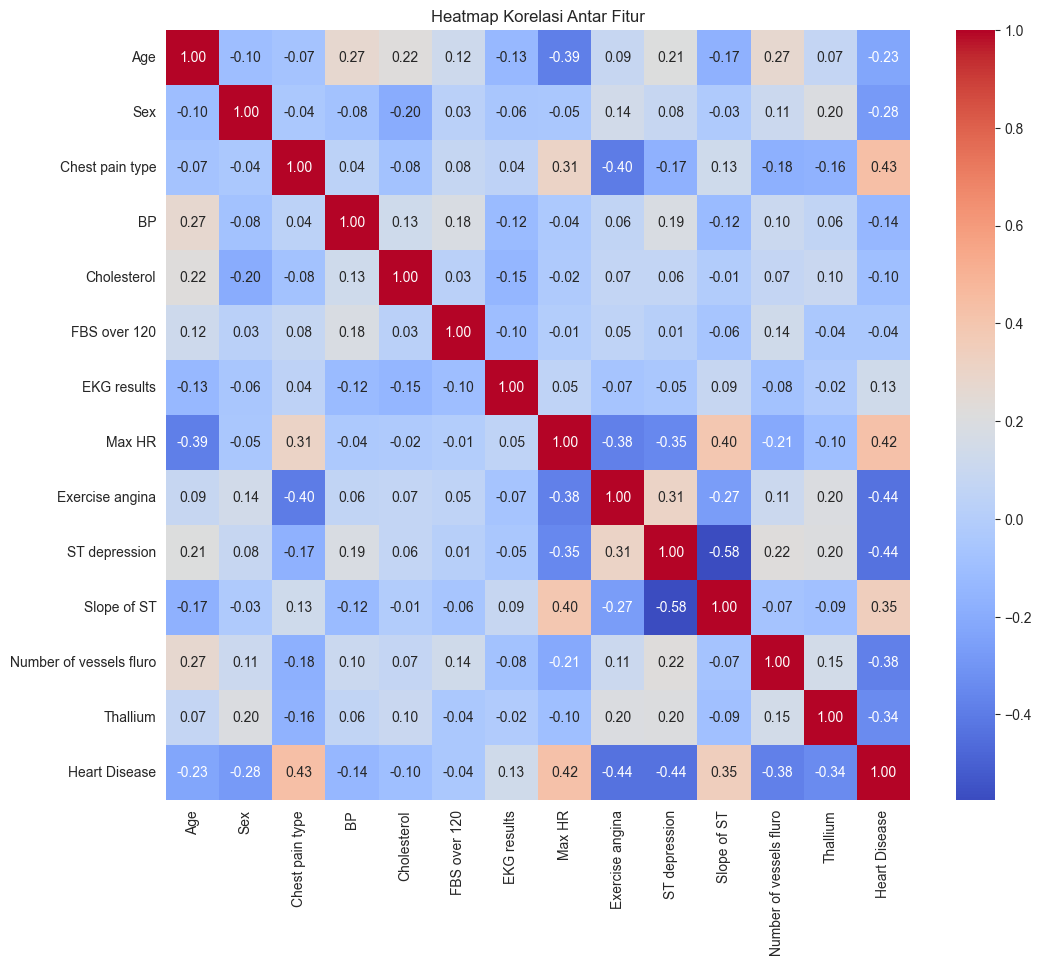

In [4]:
TARGET_COLUMN = 'Heart Disease'

print("\nStatistik Deskriptif:")
display(df.describe())

print("\nJumlah Nilai yang Hilang per Kolom:")
print(df.isnull().sum())

plt.figure(figsize=(6, 4))
sns.countplot(x=TARGET_COLUMN, data=df)
plt.title('Distribusi Kelas Penyakit Jantung')
plt.xlabel('Status Penyakit Jantung (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Pasien')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

## Preprocessing dan Persiapan Data

In [5]:
X = df.drop(TARGET_COLUMN, axis=1)
y = df[TARGET_COLUMN]

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Bentuk data latih (X_train): {X_train.shape}")
print(f"Bentuk data uji (X_test): {X_test.shape}")

Bentuk data latih (X_train): (820, 13)
Bentuk data uji (X_test): (205, 13)


## Melatih Model Machine Learning (update integrasi MLFlow)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import mlflow
import mlflow.sklearn

mlflow.set_experiment("Prediksi Penyakit Jantung v1")

with mlflow.start_run():
    
    # --- 1. Definisikan dan Log Parameter ---
    params = {
        'n_estimators': 100,
        'random_state': 42
    }
    mlflow.log_params(params)
    
    # --- 2. Latih Model ---
    model = RandomForestClassifier(**params)
    
    print("Memulai proses training model...")
    model.fit(X_train, y_train)
    print("Model berhasil dilatih!")
    
    # --- 3. Evaluasi dan Log Metrik ---
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("f1_score", f1)
    
    # --- 4. Log Artefak (Model) ---
    mlflow.sklearn.log_model(model, "model")
    
    print("\nEksperimen telah berhasil dicatat oleh MLflow.")

Memulai proses training model...
Model berhasil dilatih!


2025/07/16 19:48:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/16 19:49:00 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\NALEND~1\AppData\Local\Temp\tmp8s7xaify\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.6.1', 'cloudpickle==3.1.1']. Set logging level to DEBUG to see the full traceback. 
2025/07/16 19:49:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Eksperimen telah berhasil dicatat oleh MLflow.


## Evaluasi Model

Akurasi Model: 1.0000

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


Confusion Matrix:


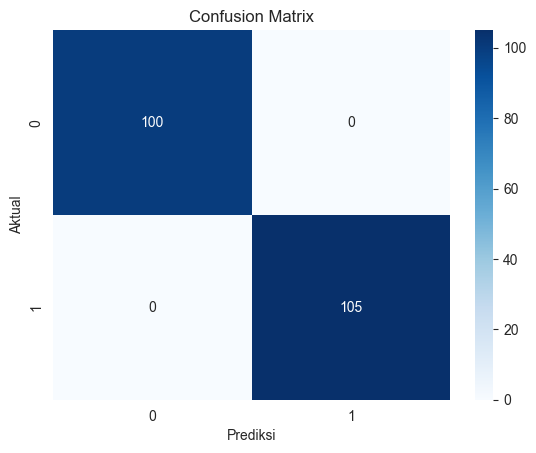

In [7]:
y_pred = model.predict(X_test)

# akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")

# presisi, recall, f1-score
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

# confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

##  Menyimpan Model yang Telah Dilatih

In [8]:
model_dir = 'model'
model_path = os.path.join(model_dir, 'random_forest_heart_disease.joblib')

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

joblib.dump(model, model_path)

print(f"Model telah berhasil disimpan di: {model_path}")

Model telah berhasil disimpan di: model\random_forest_heart_disease.joblib


# Membuat Data Sintetis dan Simulasi Drift